In [2]:
# data reading packages
import pkgutil
import encodings
import os
# data processing and visualisation packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model
# ntlf to delet stop words and ing , ed , plurale s from text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
# aditionnal packages
import re
from collections import Counter
# models packages and data spliting models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# deep learning needed packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout
# models evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')
nltk.download('stopwords') #downloading the stop words
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
# reading data using the coresspending encoding
value=False
def all_encodings():
    modnames = set([modname for importer, modname, ispkg in pkgutil.walk_packages(
        path=[os.path.dirname(encodings.__file__)], prefix='')])
    aliases = set(encodings.aliases.aliases.values())
    return modnames.union(aliases)

for enc in all_encodings():
    try:
        dataset = pd.read_csv('/content/drive/MyDrive/Projet_arn/data.csv', encoding=enc)
        value = True
    except Exception:
        continue
    if value :
      break
dataset

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Data Cleaning

1. give a name to each column from the data set

In [3]:
column = ["target","ids","date","flag","user","text"]
dataset.columns = column
dataset.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


2. get informations about the data and delete unecesarry data
- the flag never changes so we can dropit also we don't need the date and te user name to perform a text classification


In [4]:
dataset.info()
print(dataset["flag"].value_counts())
dataset  = dataset.drop(["date","flag","user"],axis=1)
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
NO_QUERY    1599999
Name: flag, dtype: int64


,target,ids,text
0,0,1467810672,is upset that he can't update his Facebook by ...
1,0,1467810917,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,my whole body feels itchy and like its on fire
3,0,1467811193,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,@Kwesidei not the whole crew


3. Data preprocessing

3.1. Cleaning

1. we replace mentions , hasthag , multiple spaces and other no-words , html tags by nothing or just a space
2. lower case the text
3. removing the ed , ing and plural s using stemmer
4. removing the english stop wrods from the text by using a pre defined package that return a list of english stop words

remarque : we can use a lemmatizer for better performace but it will take a lot of excution time



> This operation may take a lot of time (24-25min) instead of this you can directly uncomment the code in the next code cell to use a pre built dataset generated







In [5]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def remove_stopwords_andstemming(text):
  tokens= word_tokenize(text)
  filtred_token = [word for word in tokens if word not in stop_words]
  pos_tags = pos_tag(filtred_token)
  stemmed_words = [stemmer.stem(word) if pos.startswith('V') else word for word, pos in pos_tags]
  return ' '.join(stemmed_words)
#build a regex that match the mentions , hasthag , multiple spaces and other no-words , html tags
pattern =  r'(<[^>]+>|[@#]\w+|[^a-zA-Z\s])'
dataset2 = dataset.copy()
# replacing the pattern by nothing and lowercase the text
dataset2["text"] = dataset2['text'].str.replace(pattern,'').str.lower()
dataset2["text"] = dataset2['text'].apply(remove_stopwords_andstemming)
dataset2

<ipython-input-5-d288cb8e63c3>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset2["text"] = dataset2['text'].str.replace(pattern,'').str.lower()


,target,ids,text
0,0,1467810672,upset cant update facebook text might cri resu...
1,0,1467810917,dive many times ball manag save rest go bounds
2,0,1467811184,whole body feels itchi like fire
3,0,1467811193,behav im mad cant see
4,0,1467811372,whole crew
...,...,...,...
1599994,4,2193601966,woke school best feeling ever
1599995,4,2193601969,thewdbcom cool hear old walt interviews httpbl...
1599996,4,2193601991,ready mojo makeover ask details
1599997,4,2193602064,happy th birthday boo alll time tupac amaru sh...


3.2 Vocalbulary Construction

- here we are copying the old dataset into a new one and save the words that repeted more than K time

In [3]:
dataset2 = pd.read_csv("/content/drive/MyDrive/Projet_arn/dataset2.csv")
#saving new dataset as csv file
dataset3 = dataset2.copy()
dataset3 = dataset3.dropna()

In [4]:
data = dataset3["text"].tolist()
s = ''.join(data)
word_counts = Counter(s.split())
result = ''
k=10000 # this K can be changed
for word, count in word_counts.items():
    if count >= k:
      if len(word) > 1:
        result += f"{word}"+' '
with open("/content/drive/MyDrive/Projet_arn/vocab.txt","w") as file:
  file.write('')
  file.write(result)


- save the content of vocab file as list in content variable

In [5]:
with open("/content/drive/MyDrive/Projet_arn/vocab.txt","r") as file:
  content = file.read().split(" ")

- Replace each text by the existing text in vocab file only

In [6]:
def updating_datatset(text):
  words = text.split(" ")
  cleaned_words = [word for word in words if word in content]
  return  ' '.join(cleaned_words)

dataset3["text"] = dataset3["text"].apply(updating_datatset)
dataset3

,target,ids,text
0,0,1467810672,cant school today
1,0,1467810917,go
2,0,1467811184,like
3,0,1467811193,im cant see
4,0,1467811372,
...,...,...,...
1599994,4,2193601966,school best
1599995,4,2193601969,old
1599996,4,2193601991,ready
1599997,4,2193602064,happy time


- using the old dataframe that containe only the data in the vocab file we building now a new data frame that contain N features ( N is the number of words in vocab file ) + the target column so we have a fully data frame that we can train mdeols with it

In [7]:
final = pd.DataFrame(data = 0 , index = np.arange(len(dataset3)) , columns=content)
final["target"]=dataset3["target"]
for i, text in enumerate(dataset3["text"]):
    for j in text.split(" "):
        final.at[i, j] = 1
final = final.dropna()
final

,cant,school,today,go,like,im,long,time,see,lol,...,doesnt,last,could,everyone,nice,ready,best,great,,target
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592411,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.0
1592412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
1592413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.0
1592414,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.0


4. Training
- for this part of project we will use 6 algorithme which is KNN , SVM , logestic regression , neural network , decision tree , random forest

In [8]:
x_train , x_test ,y_train , y_test = train_test_split(final ,final['target'], test_size=0.05 , random_state=23)
x_train.shape

(1505624, 117)

1. KNN : using sklearn k neighbors classifier for knn algorithme and precise the number of neighbores and the metric![image_2024-04-02_165516609.png](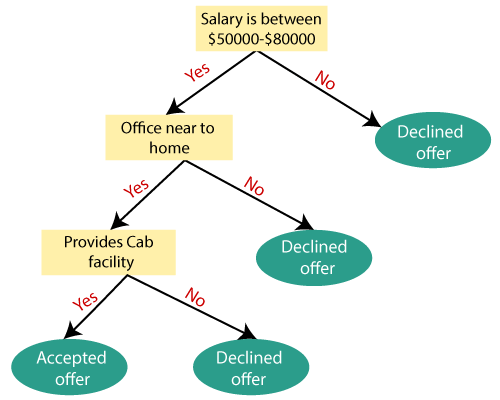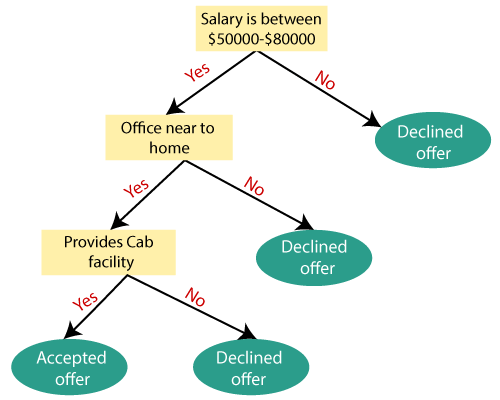) that calculate the distance between two points (in our case it's euclidean metric p=2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10 , p = 2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
knn_accuracy = metrics.accuracy_score(y_test,y_pred)
print("The Accuracy of the knn algorithme is : "+str(knn_accuracy))

2. SVM in this algorithme we are using a non linear function to generate the best non linear spearable that separate data into two classes 0 and 4

In [9]:
svm = SVC(kernel='sigmoid' , random_state=0)
svm.fit(x_train , y_train)
y_pred_svm = svm.predict(x_test)
svm_accuracy = metrics.accuracy_score(y_test,y_pred_svm)
print("The Accuracy of the SVM algorithme is : "+str(svm_accuracy))

The Accuracy of the SVM algorithme is : 1.0


3. logestic regression : this algorithme will generate a linear spearable to separate data from deferent classes and predict the test value depend on this separable

In [10]:
logestic = LogisticRegression(random_state=0)
logestic.fit(x_train , y_train )
y_pred_log = logestic.predict(x_test)
log_accuracy  = metrics.accuracy_score(y_test,y_pred_log)
print("The Accuracy of the logestic regressin model is : "+str(log_accuracy))

The Accuracy of the logestic regressin model is : 1.0


4. Decision Tree : a set of conditions ( if else ) that get generated from training data example

In [11]:
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
decision_tree.fit(x_train, y_train)
y_pred_decisionT = decision_tree.predict(x_test)
decisionT_accuracy = metrics.accuracy_score(y_test,y_pred_decisionT)
print("The Accuracy of the decision tree model is : "+str(decisionT_accuracy))

The Accuracy of the decision tree model is : 1.0


5. Random forest : a set of decision tree where the resultis the most occured result

In [12]:
random_forest = RandomForestClassifier(n_estimators=10 , criterion='entropy')
random_forest.fit(x_train,y_train)
y_pred_randomF = random_forest.predict(x_test)
randomf_accuracy = metrics.accuracy_score(y_test,y_pred_randomF)
print("The Accuracy of the random forest model is : "+str(randomf_accuracy))

The Accuracy of the random forest model is : 1.0


6. Neural Network : here we are creating a neural network with input and output layers and 2 hidden layer : the input layer have the size of content word number and the output is only one (0 or 4)

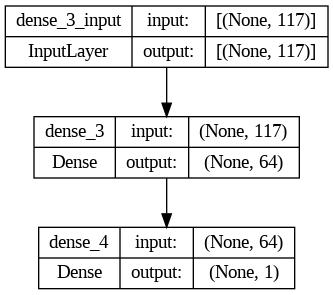

In [18]:

model = Sequential()
model.add(Dense(64 , input_shape=(len(content)+1,),activation= 'relu'))
model.add(Dense(1 ,activation= 'sigmoid'))
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size = 164
epochs = 10
train_x = np.asarray(x_train)
train_y = np.asarray(y_train)
test_x = np.asarray(x_test)
test_y = np.asarray(y_test)

NN_model = model.fit(train_x,train_y, batch_size=batch_size , epochs=epochs, validation_split=0.1)

In [17]:
train_x[:200]

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 4.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 4.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 4.]])

In [16]:
train_y[:200]

array([0., 4., 0., 4., 4., 4., 4., 4., 0., 4., 4., 4., 0., 0., 4., 4., 4.,
       0., 0., 4., 0., 0., 0., 0., 4., 0., 4., 4., 4., 4., 4., 0., 0., 0.,
       0., 4., 0., 4., 4., 0., 4., 4., 4., 4., 0., 4., 0., 4., 0., 4., 4.,
       0., 0., 4., 4., 0., 4., 4., 0., 0., 4., 4., 4., 0., 0., 4., 0., 4.,
       0., 0., 4., 4., 0., 0., 4., 4., 4., 4., 0., 0., 4., 4., 0., 0., 0.,
       0., 4., 0., 0., 4., 0., 4., 4., 4., 4., 4., 4., 0., 0., 0., 0., 0.,
       4., 0., 0., 4., 0., 4., 4., 0., 4., 0., 4., 0., 4., 0., 4., 4., 0.,
       4., 4., 0., 0., 0., 4., 0., 4., 0., 0., 4., 4., 0., 4., 0., 4., 4.,
       0., 4., 0., 0., 4., 0., 0., 0., 4., 4., 4., 0., 4., 0., 0., 4., 4.,
       0., 4., 0., 0., 4., 0., 4., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0.,
       0., 4., 0., 0., 0., 0., 0., 0., 4., 0., 4., 0., 4., 0., 0., 4., 4.,
       0., 0., 4., 4., 0., 4., 4., 4., 0., 4., 4., 0., 4.])